In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from datetime import datetime
def countDays(row):
    date_format = "%Y-%m-%d"
    a = datetime.strptime(row["launched"][:10], date_format)
    b = datetime.strptime(row["deadline"], date_format)
    delta = b - a
    return delta.days
    

In [3]:
from sklearn import preprocessing
def convertStringsToInt():
    for column in X_set.columns:
        if X_set[column].dtype == type(object):
            le = preprocessing.LabelEncoder()
            X_set[column] = le.fit_transform(X_set[column])

In [52]:
#Read data
df = pd.read_csv('ks-projects-201801.csv')
#Filter data in successful and failed only
data2 = df[(df.state == 'successful') | (df.state == 'failed') ]
#add days column
data2["days"] = data.apply(countDays, axis=1)

c:\users\den udvalgte\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
cleanData = data2.drop(['ID', 'name','category','deadline','launched','pledged','usd pledged','goal'], 1)

In [54]:
dataBinary = cleanData.copy()
dataBinary['state'] = np.where(dataBinary.state=='successful', 1, 0)

In [49]:
dataBinary['launch_month'] = pd.DatetimeIndex(dataBinary['launched']).month #1 = January
dataBinary['launch_day'] = pd.DatetimeIndex(dataBinary['launched']).weekday #0 = monday
dataBinary['weekday'] = pd.DatetimeIndex(dataBinary['launched']).day_name()

KeyError: 'launched'

In [55]:
one_hot = pd.get_dummies(dataBinary['main_category'])
dataBinary = dataBinary.join(one_hot)

one_hot = pd.get_dummies(dataBinary['currency'])
dataBinary = dataBinary.join(one_hot)

one_hot = pd.get_dummies(dataBinary['country'])
dataBinary = dataBinary.join(one_hot)

#one_hot = pd.get_dummies(dataBinary['weekday'])
#dataBinary = dataBinary.join(one_hot)

In [57]:
#cleanDataBinary = dataBinary.drop(['main_category', 'currency','country','launched', 'weekday'], 1)
cleanDataBinary = dataBinary.drop(['main_category', 'currency','country'], 1)

In [58]:
OneHotData = cleanDataBinary.copy()
X_set = OneHotData.drop(['state'], 1)
y_set = OneHotData['state']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()

In [ ]:
LogisticRegression.fit(X_train, y_train)

In [ ]:
score = LogisticRegression.score(X_val, y_val)
print(score)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

In [ ]:
score = KNeighborsClassifier.score(X_val, y_val)
print(score)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import xgboost
classifiers = []

In [ ]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=0)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5)
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

In [ ]:
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
#model2 = svm.SVC()
#classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = GaussianNB()
classifiers.append(model5)
model6 = MLPClassifier()
classifiers.append(model6)

In [ ]:
#from sklearn.model_selection import GridSearchCV
#penalty = ['l1', 'l2']

# Create regularization hyperparameter space
#C = np.logspace(0, 4, 10)

# Create hyperparameter options
#hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [9]:
data = data.drop(['ID', 'launched','name'],1)

In [23]:
data = data.drop(['pledged', 'goal','usd pledged',],1)

In [20]:
print((data.main_category.unique()))
print(len(data.category.unique()))

['Publishing' 'Film & Video' 'Music' 'Food' 'Crafts' 'Games' 'Design'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']
159


In [25]:
data = data.drop(['category'],1)

In [28]:
data['color'] = np.where(data.state=='successful', 'green', 'red')

In [39]:
data.groupby('main_category').agg('count').sort_values(by='currency')

,currency,deadline,state,backers,country,usd_pledged_real,usd_goal_real,days,color
main_category,,,,,,,,,
Dance,3573,3573,3573,3573,3573,3573,3573,3573,3573
Journalism,4149,4149,4149,4149,4149,4149,4149,4149,4149
Crafts,7818,7818,7818,7818,7818,7818,7818,7818,7818
Photography,9689,9689,9689,9689,9689,9689,9689,9689,9689
Comics,9878,9878,9878,9878,9878,9878,9878,9878,9878
Theater,10242,10242,10242,10242,10242,10242,10242,10242,10242
Fashion,19775,19775,19775,19775,19775,19775,19775,19775,19775
Food,22054,22054,22054,22054,22054,22054,22054,22054,22054
Design,25364,25364,25364,25364,25364,25364,25364,25364,25364


([<matplotlib.patches.Wedge at 0x2a10aca58d0>,
 [Text(1.0677172098487497, 0.2645372559636938, ''),
  Text(0.9205298011525331, 0.6021834315140844, ''),
  Text(0.8071661687212086, 0.7473170519076395, ''),
  Text(0.7219975397171036, 0.8298912896533194, ''),
  Text(0.4704208202382244, 0.9943360859821977, ''),
  Text(0.015779152105270623, 1.099886820704221, ''),
  Text(-0.7156646384441587, 0.8353586806160523, ''),
  Text(-1.0923370673147141, 0.12961377770241014, ''),
  Text(-1.029123242371833, -0.38846538070989767, ''),
  Text(-0.8619419620187325, -0.6834149940638542, ''),
  Text(-0.4544443713517078, -1.001738645229758, ''),
  Text(0.11102920019339181, -1.0943822534674144, ''),
  Text(0.5547693683948528, -0.9498583830712747, ''),
  Text(0.9903782484834006, -0.4786971118890857, ''),
  Text(1.0948279155253193, -0.10654499231068745, '')])

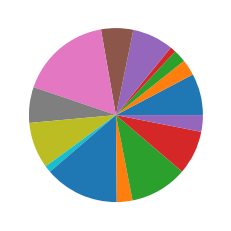

In [41]:
plt.pie(data.groupby('main_category').agg('count')['currency'])